# Insurance Cost Prediction

**Research Question:**

Predicting the insurance cost of all the people from United States based on various independent variabels available in the dataset from kaggle

Importing necessary libraries for our program

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(rc={'figure.figsize':(10,6)})

In [130]:
dataframe = pd.read_csv('insurance_data.csv')
dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Meta Data:**

Rows: 1337

Features - 06

Target Variable: (charges)


1. Age: Numeric columns with integer values
2. sex: Categorical column with value either 'male' or 'female'
3. bmi: Body mass index, ratio of height to weight (kg / m ^ 2)
4. children: No. of children
5. smoker: Categorical column for smoking preference either 'yes' or 'no'
6. region: Region with the country. [The data set taken from kaggle corresponds to the people from US]
7. charges: Medical charges billed by health insurance (in $)

In [131]:
dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [132]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Here we can see, all the numeric columns [age, bmi, children, charges] with insights to their values.

1. (Update) All the numberic values have equal number of counts which signifies no NaN or NA values
   exists in the database. Just to make sure we will caculate them again below.
2. The maximum value in 'charges' is bit high as compared the 75% percentile. Which shows
   medical charges can differ from individual based on their medical conditions.

In [133]:
#Checking for NaN values
dataframe.isna().sum()

#Checking for Null values
# dataframe.isnull().sum().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [134]:
#Checking for duplicate values if any
dataframe.duplicated().any() #.sum() will gives the count

True

In [135]:
#There exist one or more duplicate values in the dataframe
dataframe.drop_duplicates(inplace=True)

In [136]:
dataframe['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='charges', ylabel='Count'>

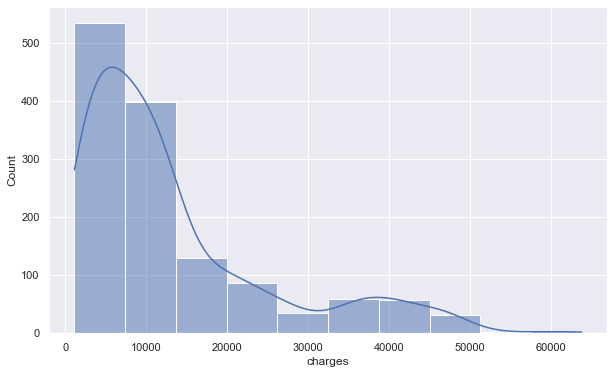

In [137]:
sns.histplot(dataframe['charges'],bins=10, stat='count', kde=True)

Using Boxplot to understand the data with comparisons to each values in each columns with Minimum, Maximum, Median Values along with the outliers.

<AxesSubplot:xlabel='smoker', ylabel='charges'>

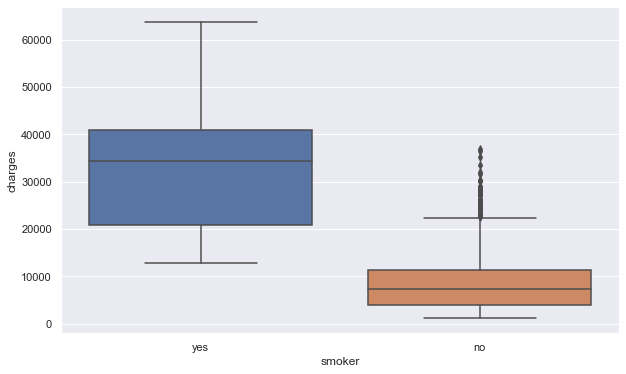

In [138]:
sns.boxplot(x='smoker', y='charges', data=dataframe)

<AxesSubplot:xlabel='region', ylabel='charges'>

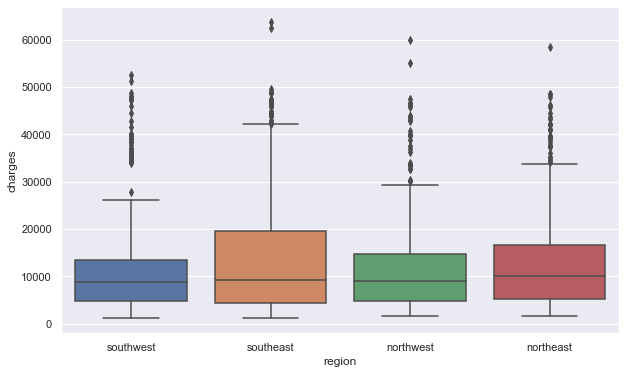

In [139]:
sns.boxplot(x='region', y='charges', data=dataframe)

<AxesSubplot:xlabel='sex', ylabel='charges'>

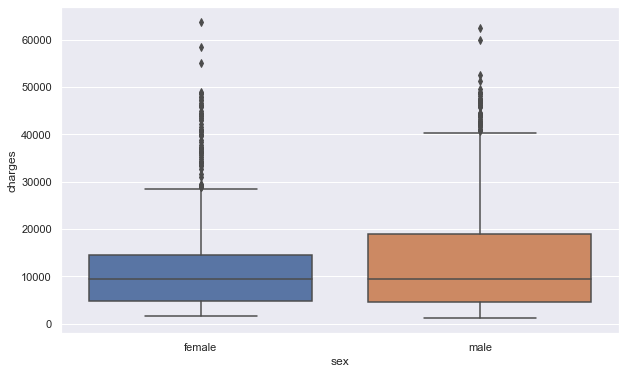

In [140]:
sns.boxplot(x='sex', y='charges',data=dataframe)

<AxesSubplot:xlabel='children', ylabel='charges'>

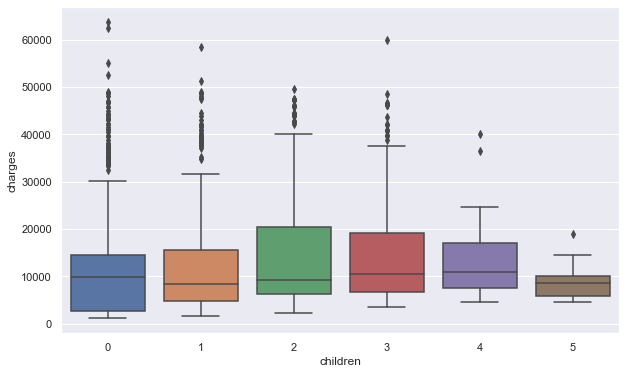

In [141]:
sns.boxplot(x='children', y='charges',data=dataframe)

Among the 6 Independent variables, **Children and Smoker** variables have a significant impact on the dependent variable i.e. Charges. The charges tends to increase with the number of children and if the smoking preference is yes.

Analysing the distribution of 'charges' with respect to 'smoker' variable

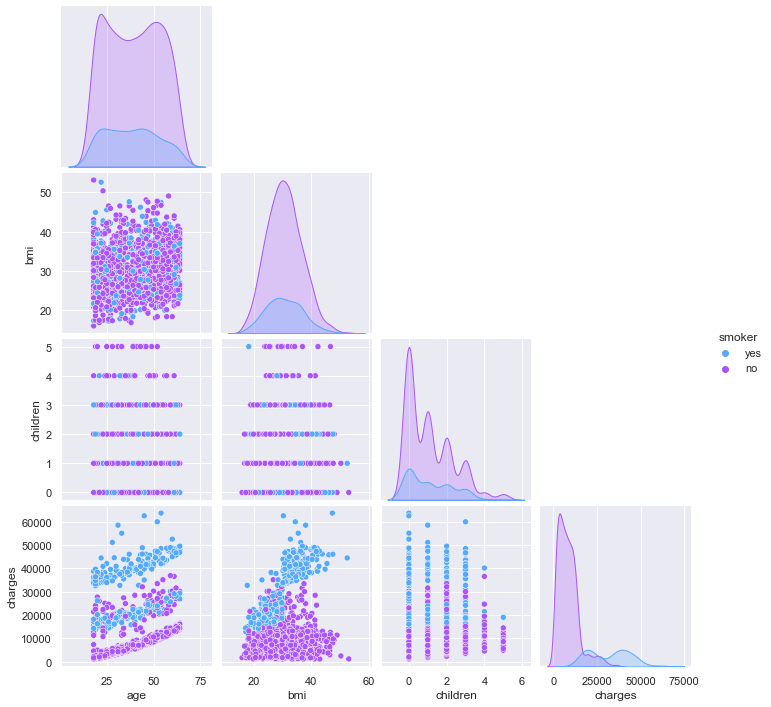

In [142]:
# Plotting 'smoker'
sns.pairplot(dataframe, hue='smoker', palette='cool', corner=True)
plt.show()

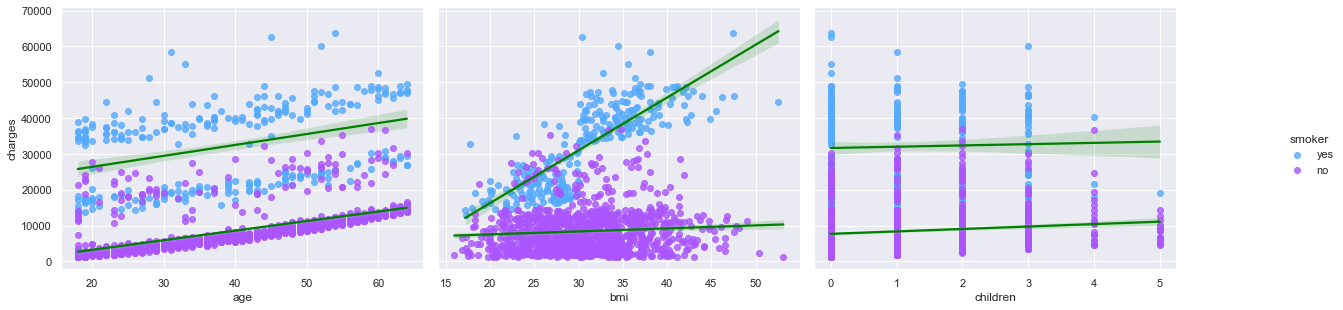

In [143]:
sns.pairplot(dataframe, x_vars= ['age', 'bmi', 'children'], y_vars=['charges'], hue='smoker', palette='cool',kind="reg",
             plot_kws={'line_kws':{'color':'green'}}
            ).fig.set_size_inches(20,5)

From the above graphs we can clearly see how Non-Smokers are generally billed less as compared to the Smoker population.

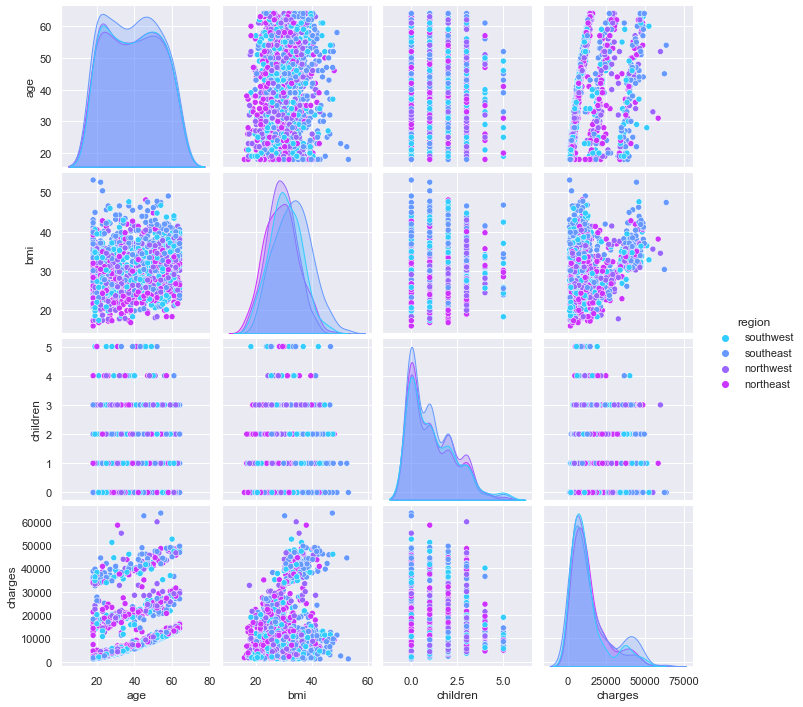

In [144]:
# Plotting 'region'
sns.pairplot(dataframe, hue='region', palette='cool') 
plt.show()

C:\Users\rangi\AppData\Local\Temp\ipykernel_7404\3772652229.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='BMI')


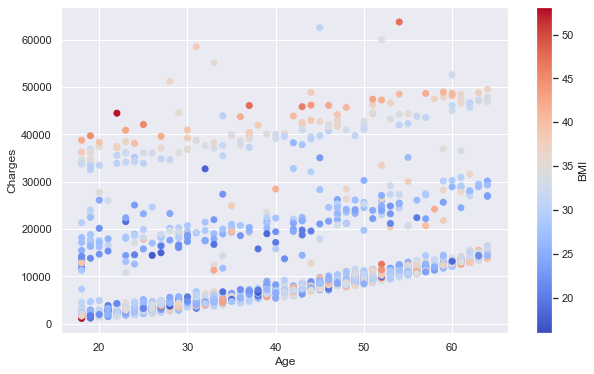

In [145]:
# plt.hist(dataframe[['charges']])
plt.scatter(dataframe[['age']], dataframe[['charges']], cmap='coolwarm', c=dataframe['bmi'])
plt.colorbar(label='BMI')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

It is pretty clear that with high BMI (Body Mass Index) the insurance cost is generally high for all the people irrespective of the ages, and with increase in age the insurance cost increases as well irrespective of any other condition.


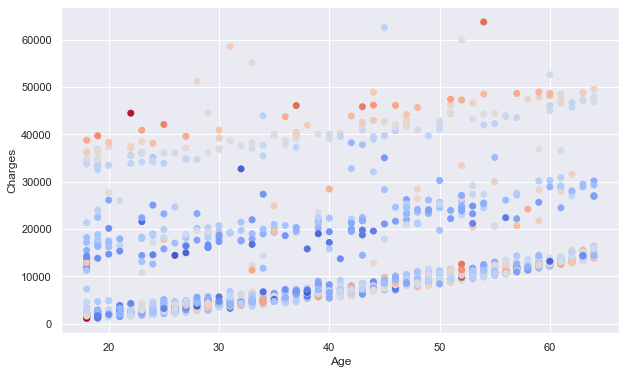

In [147]:
# plt.hist(dataframe[['charges']])
plt.scatter(dataframe[['age']], dataframe[['charges']], cmap='coolwarm', c=dataframe['bmi'])
# plt.colorbar(label='BMI')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [149]:
dataframe.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


From the above correlation matrix we can see there is no strong relation among the variables mentioned above


Single 'smoker' is a categorical variabel, we need to convert it to integral value to check for correlation between the independent variable i.e 'charges.

In [157]:
dataframe['smoker_value']=(dataframe['smoker']=='yes').astype(int)
dataframe.corr()

,age,bmi,children,charges,smoker_type,sex_type,smoker_value
age,1.000000,0.109344,0.041536,0.298308,-0.025587,-0.019814,-0.025587
bmi,0.109344,1.000000,0.012755,0.198401,0.003746,0.046397,0.003746
children,0.041536,0.012755,1.000000,0.067389,0.007331,0.017848,0.007331
charges,0.298308,0.198401,0.067389,1.000000,0.787234,0.058044,0.787234
smoker_type,-0.025587,0.003746,0.007331,0.787234,1.000000,0.076596,1.000000
sex_type,-0.019814,0.046397,0.017848,0.058044,0.076596,1.000000,0.076596
smoker_value,-0.025587,0.003746,0.007331,0.787234,1.000000,0.076596,1.000000


Smoker have shown a 0.765 correlation value with charges variable which signifies a strong positive correlation between them.